In [ ]:
#Import relevant libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio

#2.1: Creating arrays/signals and basic plotting
[NumPy](https://numpy.org/) is a fundamental library for handling arrays in python. Much (probably all) of the array processing done in matlab can also be done with NumPy. For plotting, python has the [matplotlib](https://matplotlib.org/) library. There are a variety of visualizations one can make with matplotlib, and there is a lot of flexibliity in how you can edit properties of a plot to make it easier to read or understand. Check out the [documentation](https://matplotlib.org/stable/faq/howto_faq.html) to see what is possible. Also google can be helpful :)

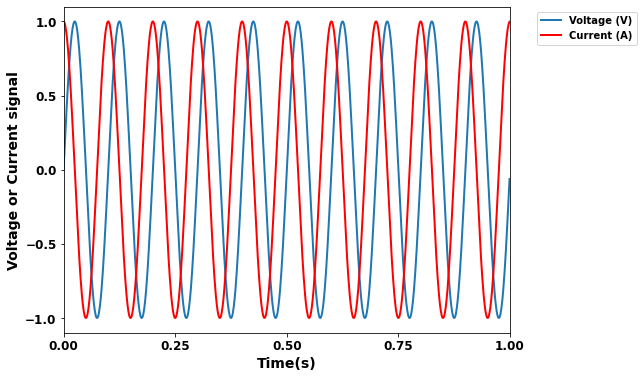

In [ ]:
# Generate Signals

t = np.arange(0,1,.001) #returns values spaced by .001 and not including the stop value
x = np.sin(2*np.pi*10*t)
y = np.sin(2*np.pi*10*t + np.pi/2)

# Plot Signals

fig,ax = plt.subplots(figsize=(8,6))
ax.plot(t,x, color = 'tab:blue',linewidth=2,label='Voltage (V)')
ax.plot(t,y,color='red',linewidth=2, label = 'Current (A)')
ax.set(xlim=(0,1), ylim=(-1.1,1.1))
ax.set_xlabel('Time(s)',fontweight='bold',fontsize=14)
ax.set_ylabel('Voltage or Current signal',fontweight='bold',fontsize=14)
plt.xticks(ticks = [0, 0.25, 0.5, 0.75, 1], fontsize=12,fontweight='bold')
plt.yticks(ticks = [-1, -0.5, 0, 0.5, 1], fontsize=12, fontweight='bold')
ax.legend(loc='upper left',fontsize=12,prop={'weight':'bold'}, bbox_to_anchor=(1.05,1.0))
fig.show()



#2.2 Element-wise manipulations

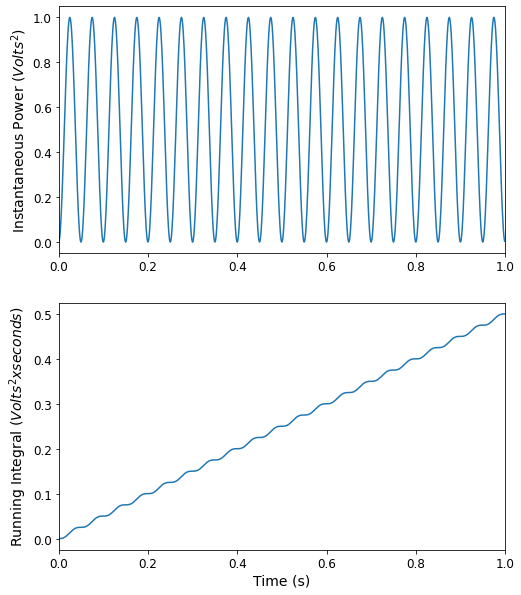

In [ ]:
#Compute instantaneous power and the running integral
P = x**2
E = np.cumsum(P) * .001

#Make plots

fig,ax = plt.subplots(2,1,figsize=(8,10))
ax[0].plot(t,P)
ax[0].set(xlim=[0,1])
ax[0].set_ylabel('Instantaneous Power ($Volts^2$)', fontsize=14)
ax[0].tick_params(axis='both', which='major', labelsize=12)

ax[1].plot(t,E)
ax[1].set(xlim=[0,1])
ax[1].set_ylabel('Running Integral ($Volts^2 x seconds$)', fontsize=14)
ax[1].set_xlabel('Time (s)',fontsize=14)
ax[1].tick_params(axis='both', which='major', labelsize=12)
fig.show()

#2.3 Indexing, Data Exploration and more array manipulations

Mounted at /content/gdrive/


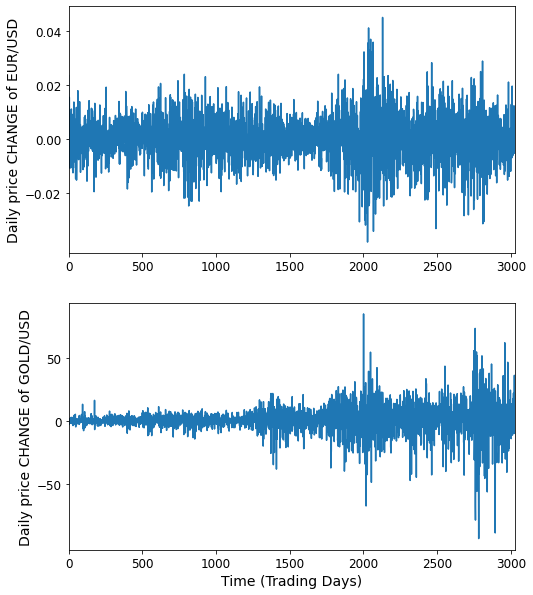

In [ ]:
import scipy.io as sio
from google.colab import drive
drive.mount('/content/gdrive/') #gain acess to my google drive where I put marketdata.mat
pathToFile = '/content/gdrive/MyDrive/Purdue/BME511/ProblemSets/PS0/marketdata.mat' 

#Load Data
marketdata = sio.loadmat(pathToFile)
eurusd = marketdata['eurusd']
xauusd = marketdata['xauusd']

#Compute daily change in price
eur_change = np.diff(eurusd,axis=0)
gld_change = np.diff(xauusd,axis=0)

#Plot daily change in price
fig,ax = plt.subplots(2,1,figsize=(8,10))
ax[0].plot(eur_change)
ax[0].set_ylabel('Daily price CHANGE of EUR/USD',fontsize=14)
ax[0].set_yticks([-.02,0,.02,.04])
ax[0].tick_params(axis='both', which='major', labelsize=12)
ax[0].set_xlim([0,eur_change.size])


ax[1].plot(gld_change)
ax[1].set_ylabel('Daily price CHANGE of GOLD/USD',fontsize=14)
ax[1].set_xlabel('Time (Trading Days)',fontsize=14)
ax[1].set_yticks([-50,0,50])
ax[1].tick_params(axis='both', which='major', labelsize=12)
ax[1].set_xlim([0,gld_change.size])
fig.show()


In [ ]:
'''
Questions:
1) On how many days has the price of GOLD gone up and how many days has it 
gone down compared to the previous day?
2) On how many days has the price of GOLD gone up by more than 15 USD?
'''
#1
gold_up = np.sum(gld_change>0)
gold_down = np.sum(gld_change < 0)
print(' \n 1) Gold has gone up for ' + str(gold_up) +' days and down for ' 
      + str(gold_down) + ' days compared to the previous day \n')

#2
gold_up15 = np.sum(gld_change>15)
print(' \n 2) Gold has gone up by more than 15 USD in a day on ' + 
      str(gold_up15) +' days \n')


 
 1) Gold has gone up for 1643 days and down for 1352 days compared to the previous day 

 
 2) Gold has gone up by more than 15 USD in a day on 188 days 



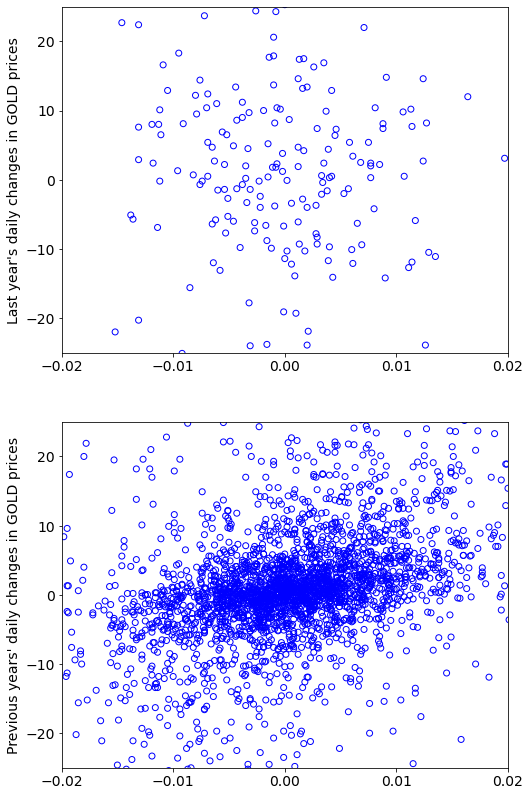

In [ ]:
#Look at past 200 days
EUR2012 = eurusd[eurusd.size-200:]
XAU2012 = xauusd[xauusd.size-200:]

#Look up until last 200 days
EURyearsago = eurusd[:-200]
XAUyearsago = xauusd[:-200]

#Plot data

fig,ax = plt.subplots(2,1,figsize=(8,14))

ax[0].scatter(np.diff(EUR2012,axis=0), np.diff(XAU2012,axis=0),facecolors='none',edgecolors='b')
ax[0].set(xlim=[-.02,.02],ylim=[-25,25])
ax[0].set_xticks([-.02,-.01, 0, .01,0.02])
ax[0].set_ylabel('Last year\'s daily changes in GOLD prices',fontsize=14)
ax[0].tick_params(axis='both', which='major', labelsize=14)

ax[1].scatter(np.diff(EURyearsago,axis=0),np.diff(XAUyearsago,axis=0),facecolors='none',edgecolor='b')
ax[1].set(xlim=[-.02,.02],ylim=[-25,25])
ax[1].set_xticks([-.02,-.01, 0, .01,0.02])
ax[1].set_ylabel('Previous years\' daily changes in GOLD prices',fontsize=14)
ax[1].tick_params(axis='both', which='major', labelsize=14)

fig.show()


#2.4 Loops, 2D arrays etc


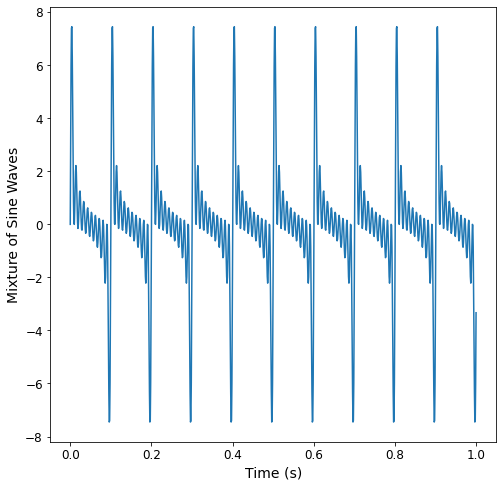

In [ ]:
#Generate mixtureOfSines
frequencies = np.arange(10,110,10)
mixtureOfSines = np.zeros([frequencies.size,t.size])
for f in range(frequencies.size):
  mixtureOfSines[f,:] = np.sin(2*np.pi*frequencies[f]*t)

#Plot data
fig,ax = plt.subplots(figsize=(8,8))
ax.plot(t,np.sum(mixtureOfSines,axis=0))
ax.set_ylabel('Mixture of Sine Waves',fontsize=14)
ax.set_xlabel('Time (s)',fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=12)
